### Загрузим данные и подготовим их к анализу

#### Изучим данные.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # визиты
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # расходы
)

In [3]:
visits.info()
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.info()
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


#### Заменим названия столбцов.

In [6]:
# замена названий столбцов
visits.columns = visits.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
costs.columns = costs.columns.str.replace(' ', '_').str.lower()
print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


#### Преобразуем данные в нужные типы.

In [7]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

#### Проверим данные на пропуски.

In [8]:
# проверка пропусков
print(visits.isna().sum())
print(orders.isna().sum())
print(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
user_id     0
event_dt    0
revenue     0
dtype: int64
dt         0
channel    0
costs      0
dtype: int64


В данных отсутствуют пропуски.

#### Проверим данные на явные и неявные дубликаты.

In [9]:
# проверка явных дубликатов
print('Количество явных дубликатов в визитах:', visits.duplicated().sum())
print('Количество явных дубликатов в заказах:', orders.duplicated().sum())
print('Количество явных дубликатов в расходах:', costs.duplicated().sum())

Количество явных дубликатов в визитах: 0
Количество явных дубликатов в заказах: 0
Количество явных дубликатов в расходах: 0


In [10]:
# проверка неявных дубликатов в столбце со странами
visits['region'].sort_values(ascending=False).unique()

array(['United States', 'UK', 'Germany', 'France'], dtype=object)

In [11]:
# проверка неявных дубликатов в столбце с типами устройств
visits['device'].sort_values(ascending=False).unique()

array(['iPhone', 'PC', 'Mac', 'Android'], dtype=object)

In [12]:
# проверка неявных дубликатов в столбце с идентификаторами источника
print(visits['channel'].sort_values(ascending=False).unique())
print(costs['channel'].sort_values(ascending=False).unique())

['organic' 'lambdaMediaAds' 'YRabbit' 'WahooNetBanner' 'TipTop'
 'RocketSuperAds' 'OppleCreativeMedia' 'MediaTornado' 'LeapBob' 'FaceBoom'
 'AdNonSense']
['lambdaMediaAds' 'YRabbit' 'WahooNetBanner' 'TipTop' 'RocketSuperAds'
 'OppleCreativeMedia' 'MediaTornado' 'LeapBob' 'FaceBoom' 'AdNonSense']


В данных отсутствуют явные и неявные дубликаты.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.
#### Функции для вычисления значений метрик:
#####  get_profiles() — для создания профилей пользователей

In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### get_retention() — для подсчёта Retention Rate

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### get_conversion() — для подсчёта конверсии

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### get_ltv() — для подсчёта LTV

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков:

##### filter_data() — для сглаживания данных

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### plot_retention() — для построения графика Retention Rate

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### plot_conversion() — для построения графика конверсии

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### plot_ltv_roi — для визуализации LTV и ROI

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09,False,0.205714


In [22]:
# доступный интервал привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


В задании сказано, что имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Значит, этот период соответствует указанному в задании.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [23]:
(profiles
    .groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'users', 'payer': 'paying_share'})
    .sort_values(by='paying_share', ascending=False)
    .style
    .format({'paying_share': '{:.3f}'})
    .highlight_max(color='yellowgreen')
    .highlight_min(color='coral')
)

,users,paying_share
region,,
United States,100002,0.069
Germany,14981,0.041
UK,17575,0.040
France,17450,0.038


Доля платящих пользователей больше в США, затем идут Германия, Великобритания и Франция.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [24]:
# количество пользователей по устройствам
(profiles
    .groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'users', 'payer': 'paying_share'})
    .sort_values(by='paying_share', ascending=False)
    .style
    .format({'paying_share': '{:.3f}'})
    .highlight_max(color='yellowgreen')
    .highlight_min(color='coral')
)

,users,paying_share
device,,
Mac,30042,0.064
iPhone,54479,0.062
Android,35032,0.059
PC,30455,0.050


Доля платящих пользователей больше среди пользователей, которые предпочитают Mac, затем идут пользователи, которые предпочитают iPhone, Android и PC.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
(profiles
    .groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'users', 'payer': 'paying_share'})
    .sort_values(by='paying_share', ascending=False)
    .style
    .format({'paying_share': '{:.3f}'})
    .highlight_max(color='yellowgreen')
    .highlight_min(color='coral')
)

,users,paying_share
channel,,
FaceBoom,29144,0.122
AdNonSense,3880,0.113
lambdaMediaAds,2149,0.105
TipTop,19561,0.096
RocketSuperAds,4448,0.079
WahooNetBanner,8553,0.053
YRabbit,4312,0.038
MediaTornado,4364,0.036
LeapBob,8553,0.031


Доля платящих пользователей больше у канала FaceBoom, затем идут каналы AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.

In [26]:
print('Общая сумма расходов на маркетинг:', profiles['acquisition_cost'].sum().round(1))

Общая сумма расходов на маркетинг: 105497.3


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [27]:
(costs
    .groupby('channel')
    .agg({'costs': 'sum'})
    .sort_values(by='costs', ascending=False)
)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего денег было потрачено на рекламные источники TipTop и FaceBoom. При этом на TipTop было потрачено больше половины от общей суммы расходов на маркетинг. 

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

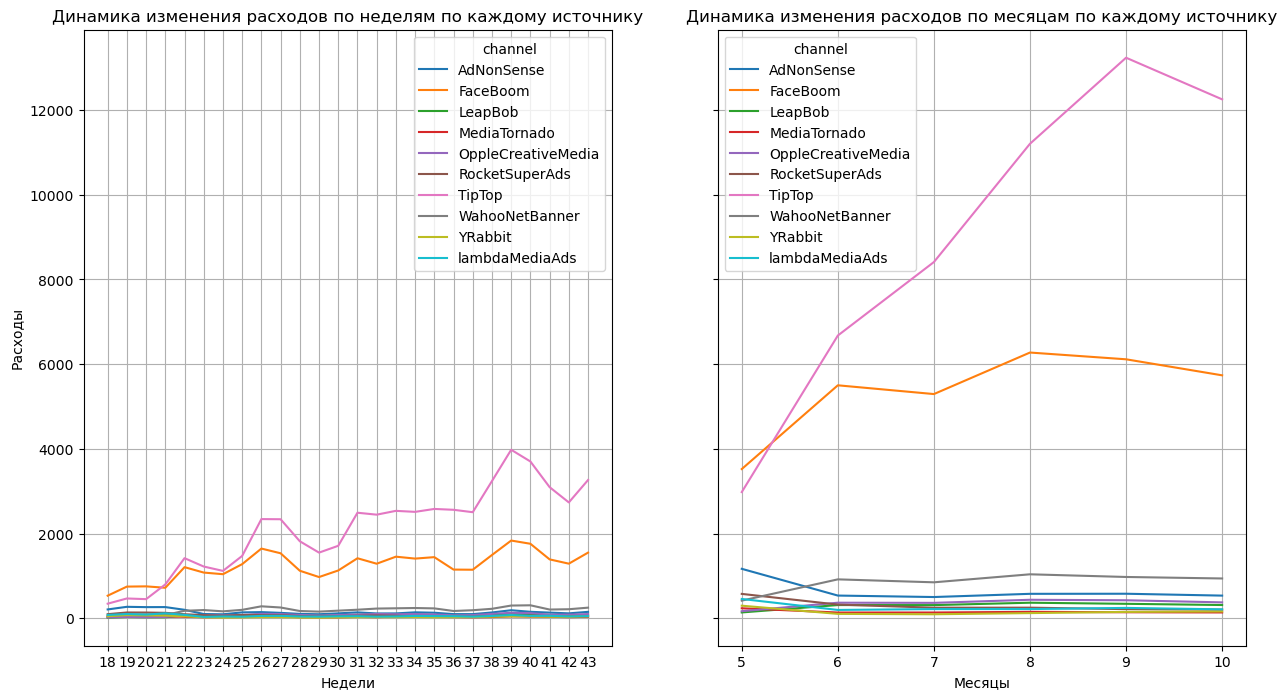

In [28]:
channel_cost = costs
channel_cost['week'] = pd.to_datetime(channel_cost['dt']).dt.isocalendar().week
channel_cost['month'] = pd.to_datetime(channel_cost['dt']).dt.month

ax1=plt.subplot(1, 2, 1)
(channel_cost
 .pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')
 .plot(figsize=(15, 8), legend=True, grid=True, ax=ax1)
)
plt.xticks(np.arange(min(channel_cost['week']), max(channel_cost['week'])+1, 1.0)) 
plt.title('Динамика изменения расходов по неделям по каждому источнику')
plt.xlabel('Недели')
plt.ylabel('Расходы')

ax2=plt.subplot(1, 2, 2, sharey = ax1)
(channel_cost
 .pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')
 .plot(figsize=(15, 8), legend=True, grid=True, ax=ax2)
)
plt.title('Динамика изменения расходов по месяцам по каждому источнику')
plt.xlabel('Месяцы')
plt.ylabel('Расходы')
plt.show()

На графике заметен рост расходов на каналы TipTop и FaceBoom, который достигает пика в сентябре (на 39 неделе), затем расходы резко снижаются и в октябре (с 42 недели) снова начинают расти. Расходы на остальные каналы стабильно низкие.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [29]:
# считаем средний CAC по каналам привлечения
(profiles
    .groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .round(3)
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by='cac', ascending=False)
)

,cac
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
MediaTornado,0.219
YRabbit,0.219


Средняя стоимость привлечения одного пользователя из источника TipTop в 2,5 раза больше, чем из источника FaceBoom.

**Выводы**

Больше всего денег было потрачено на рекламные источники TipTop и FaceBoom. При этом на TipTop было потрачено больше половины от общей суммы расходов на маркетинг. Рост расходов на каналы TipTop и FaceBoom достиг пика в сентябре (на 39 неделе), затем расходы резко снижаются и в октябре (с 42 недели) снова начинают расти. Расходы на остальные каналы стабильно низкие. Средняя стоимость привлечения одного пользователя из источника TipTop в 2,5 раза больше, чем из источника FaceBoom.

При этом результаты исследовательского анализа показали, что доля платящих пользователей больше у канала FaceBoom, в то время как канал TipTop при довольно больших расходах находится лишь на 4 месте по доле платящих пользователей.

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

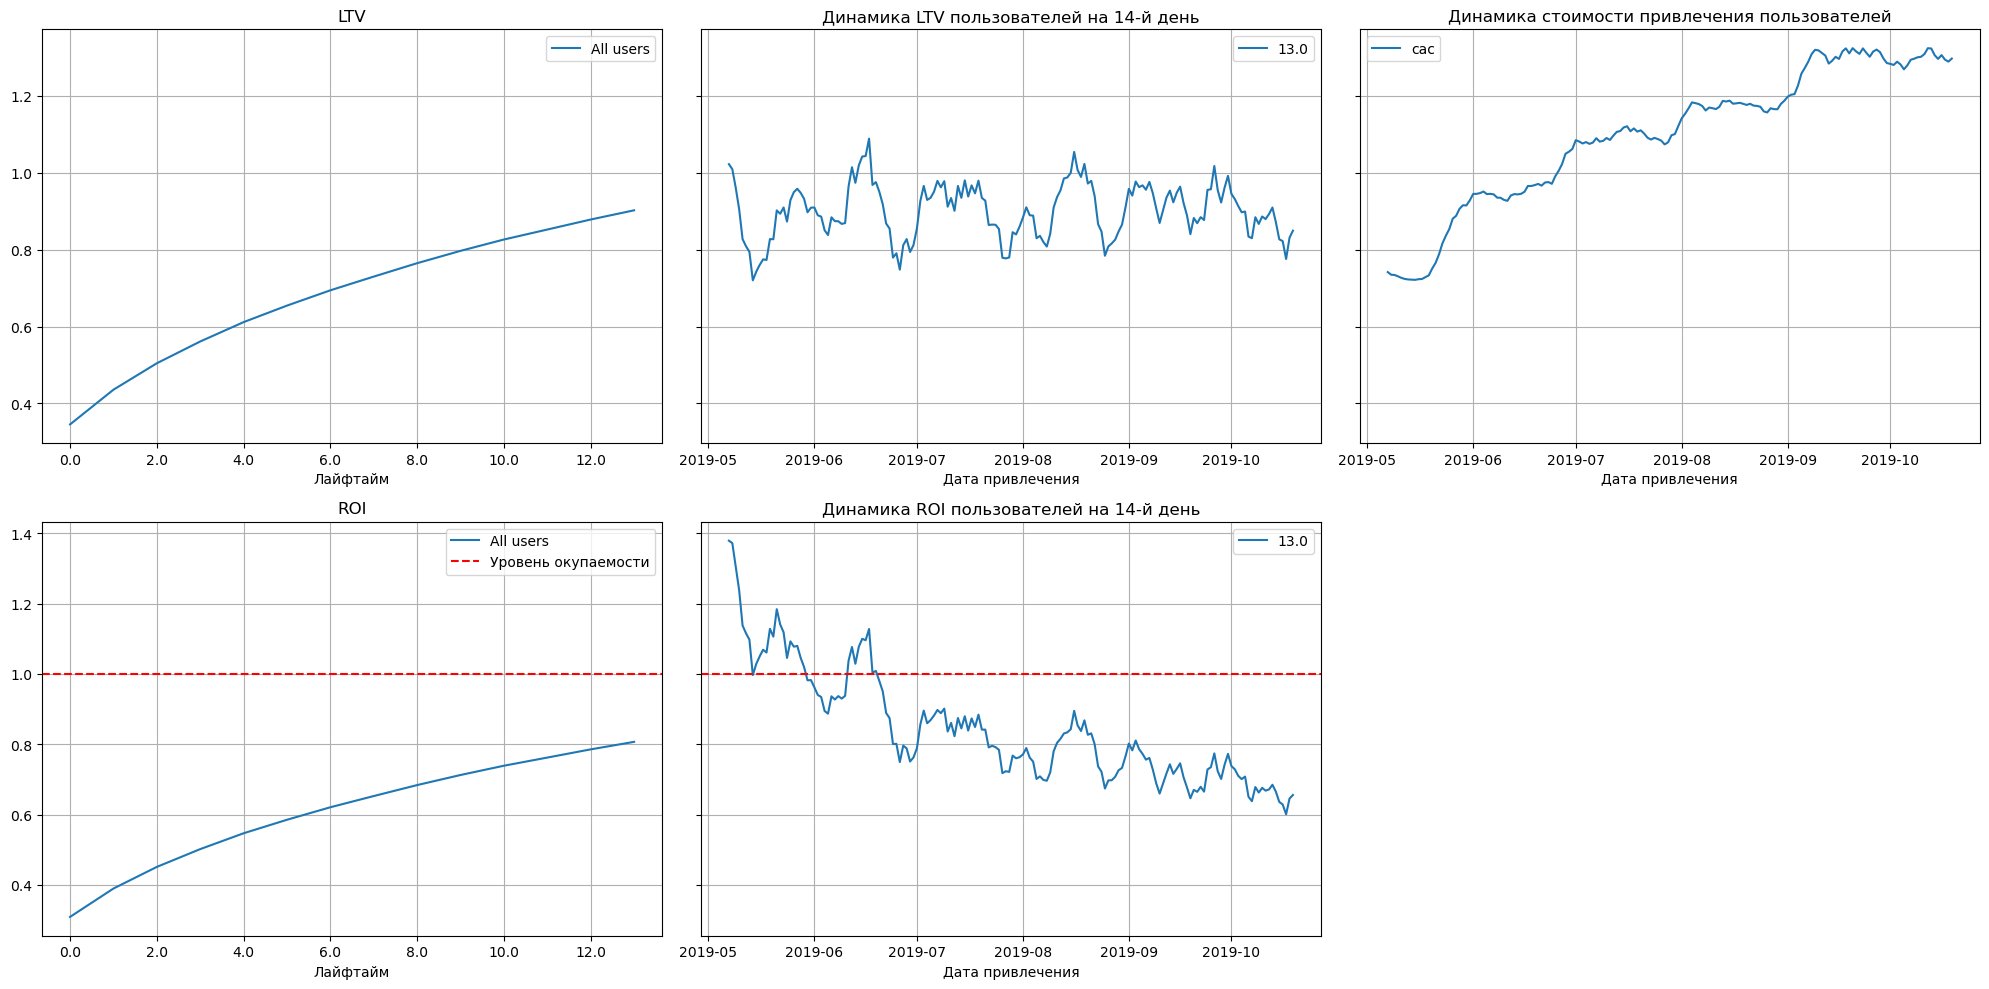

In [30]:
# исключим из анализа органических пользователей
profiles = profiles.query('channel != "organic"')

# установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:
- Реклама не окупается. ROI в конце недели — чуть выше 80%.
- CAC постоянно растет. Проблемы с окупаемостью могут быть связаны с увеличением рекламного бюджета.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

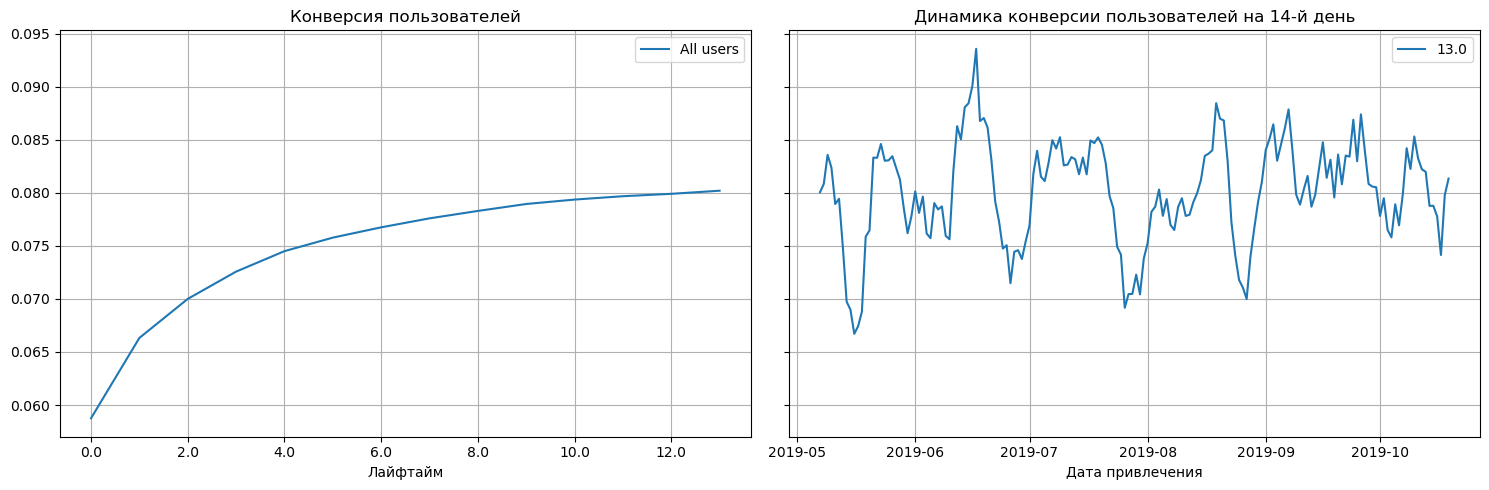

In [31]:
# считаем конверсию и динамику ее изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам видно, что пользователи хорошо конвертируются, причём постоянно.

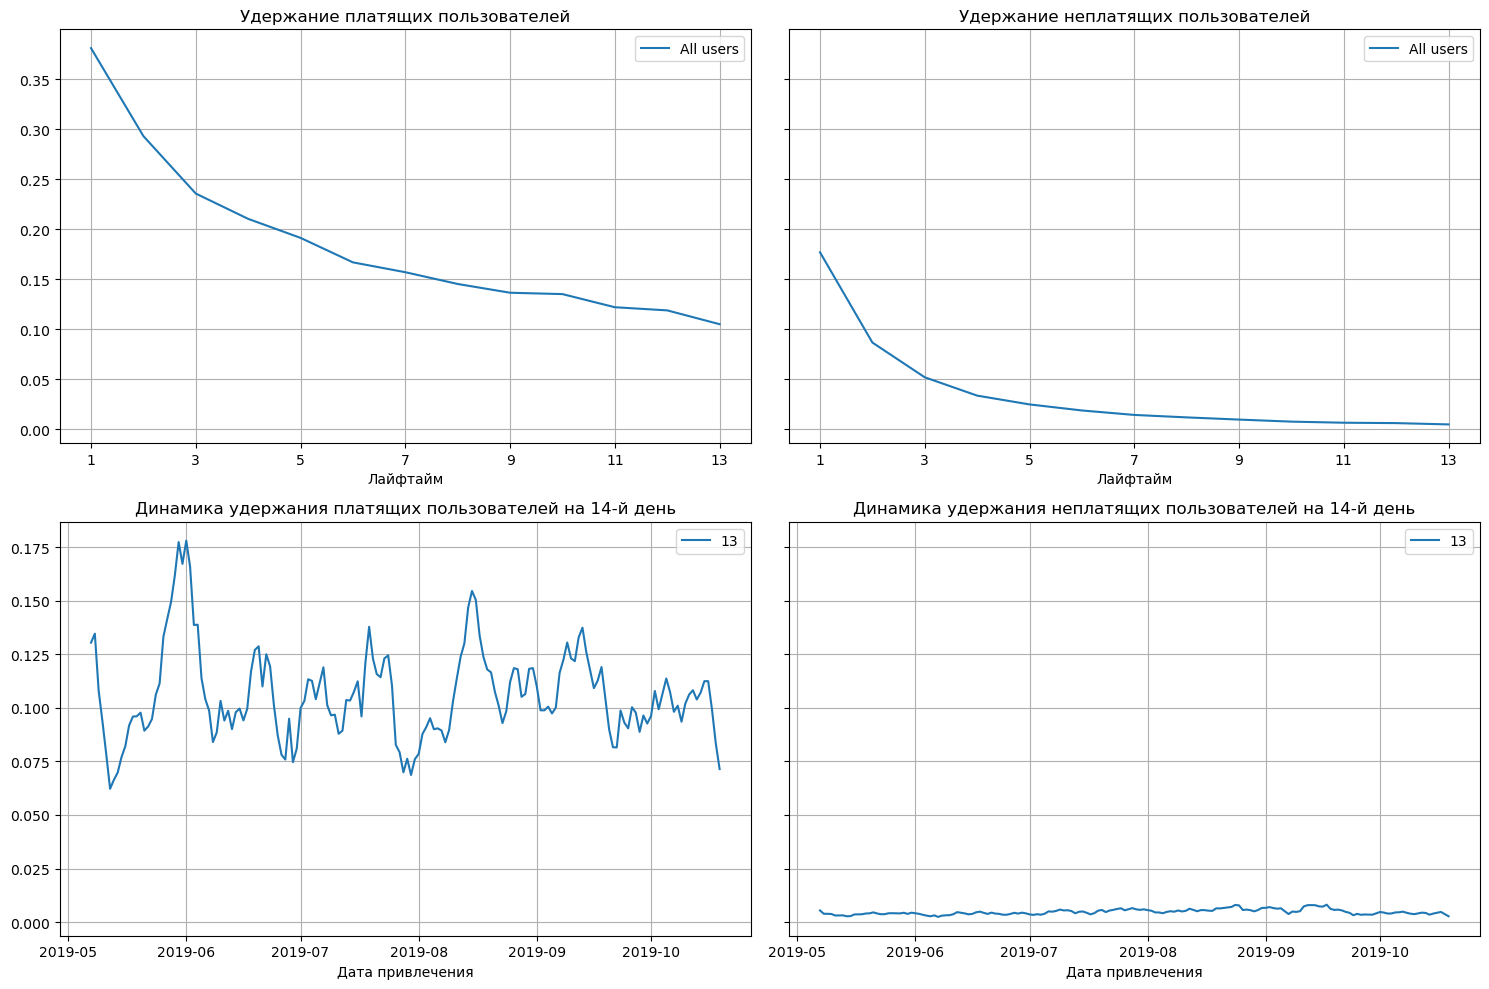

In [32]:
# считаем удержание и динамику его изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

По графикам можно сделать следующие выводы:
- Пользователи стабильно плохо удерживаются.
- Удержание платящих пользователей выше, чем неплатящих.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

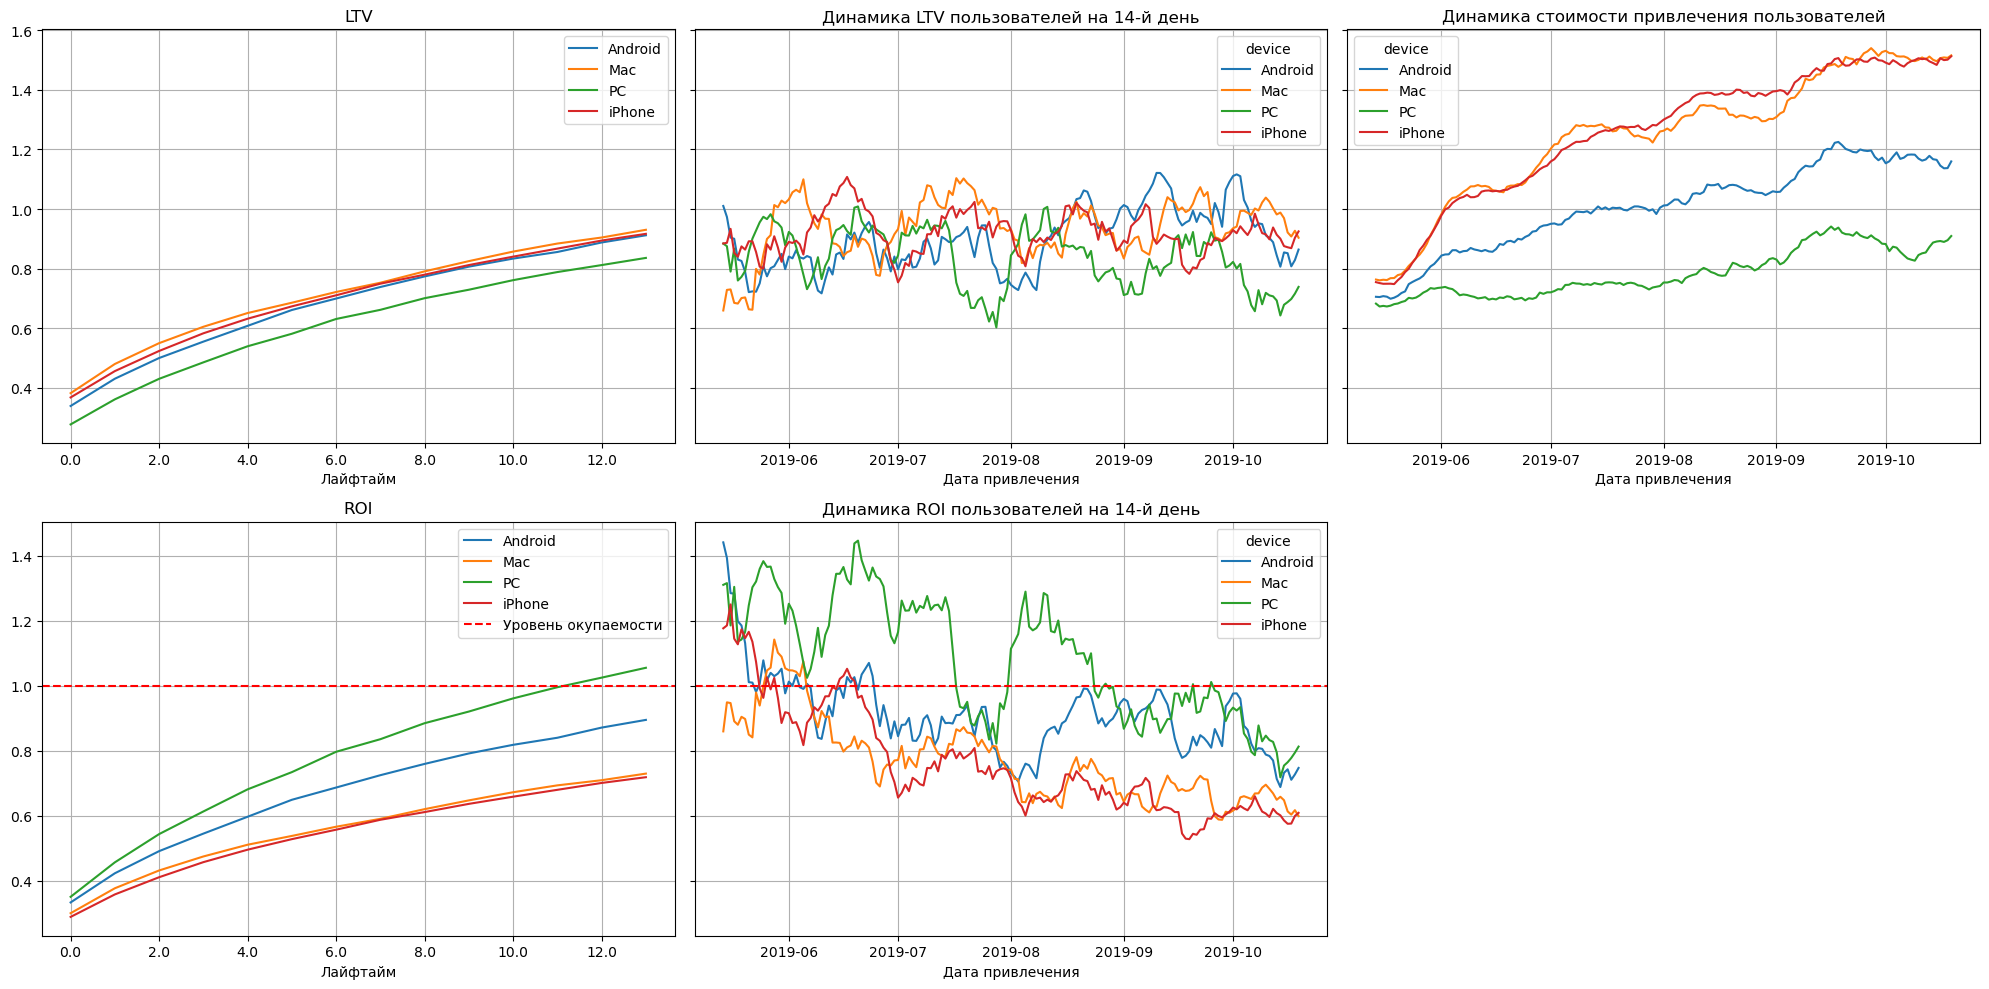

In [33]:
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- LTV ниже у пользователей PC.
- Стоимость привлечения пользователей Mac и iPhone выше, чем у пользователей Android. У пользователей PC самая низкая стоимость привлечения.
- График ROI показывает, что реклама окупилась только у пользователей PC.
- Судя по динамике ROI пользователей на 14 день, с сентября реклама перестала окупаться у всех пользователей. Это может быть связано с удержанием пользователей.

Пользователи PC окупаются, а пользователи Mac, iPhone и Android — нет.
Узнаем, в чём причина: в низкой конверсии или низком удержании.

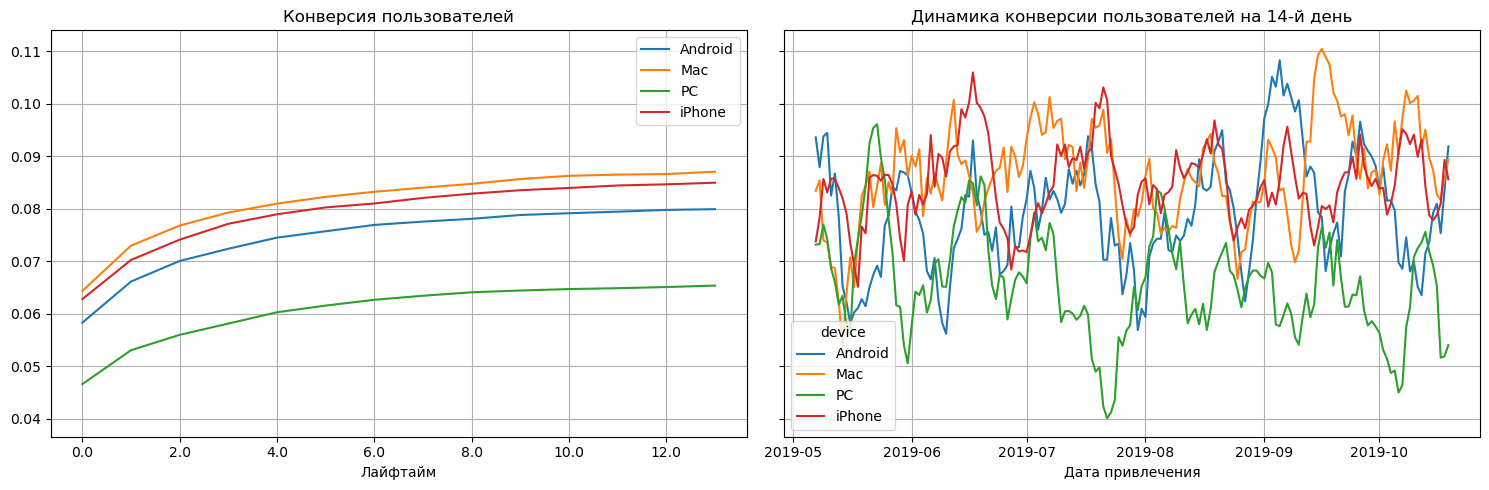

In [34]:
# считаем конверсию и динамику ее изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графику коверсии, пользователи Mac, iPhone и Android ковертируются лучше, чем пользователи PC.

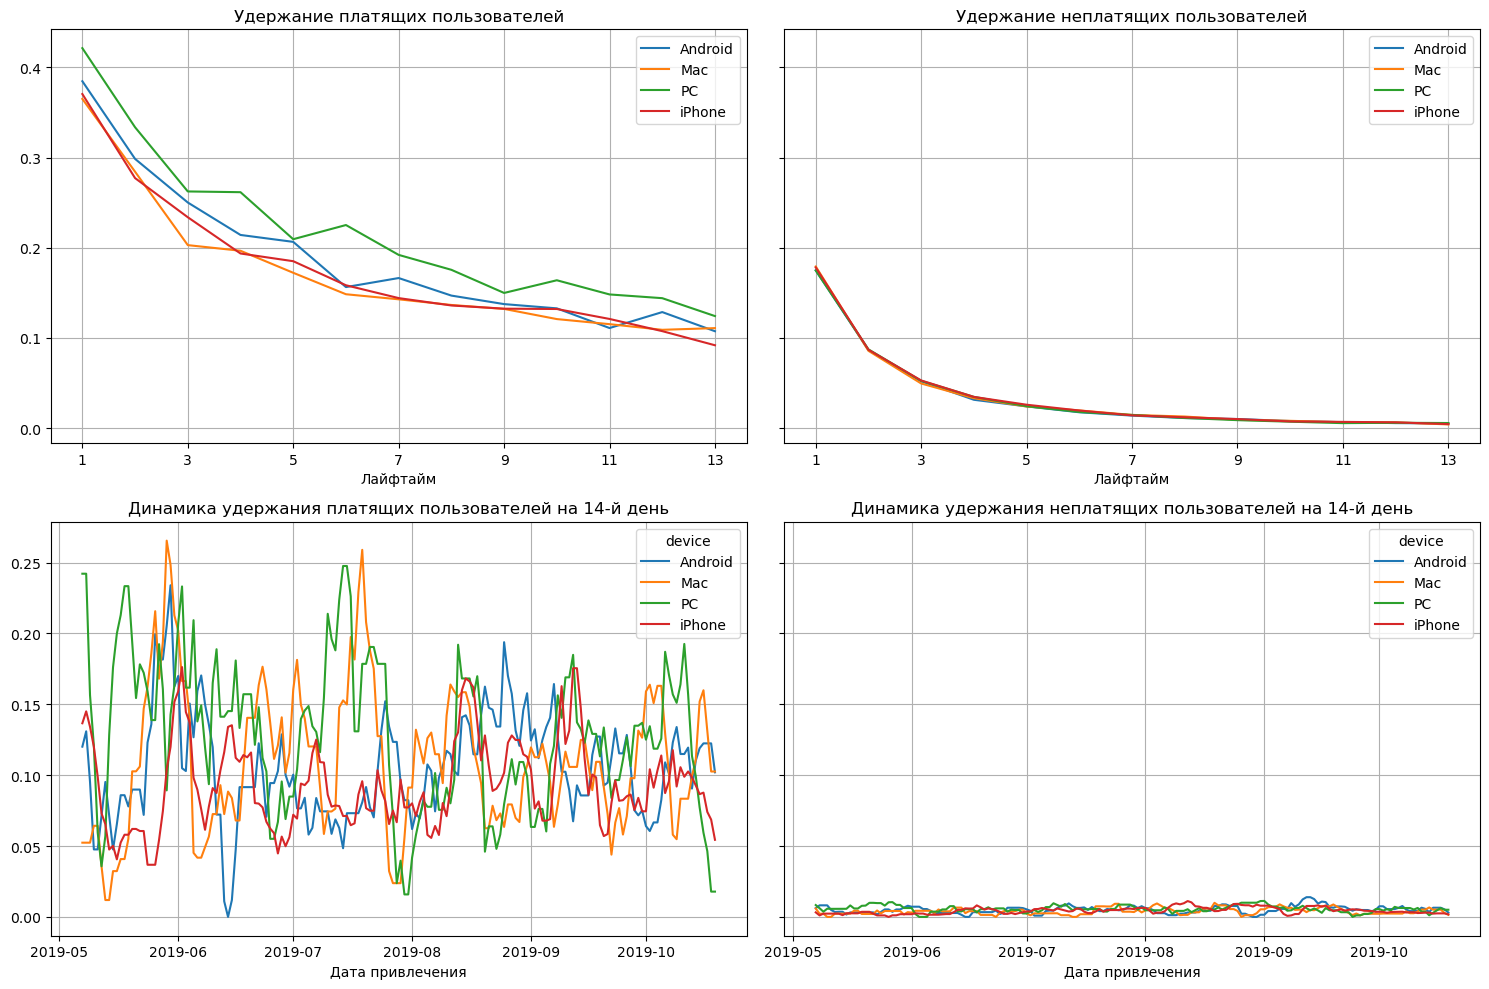

In [35]:
# считаем удержание и динамику его изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Графики показывают, что у платящих пользователей Mac, iPhone и Android удержание ниже, чем у пользователей PC.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

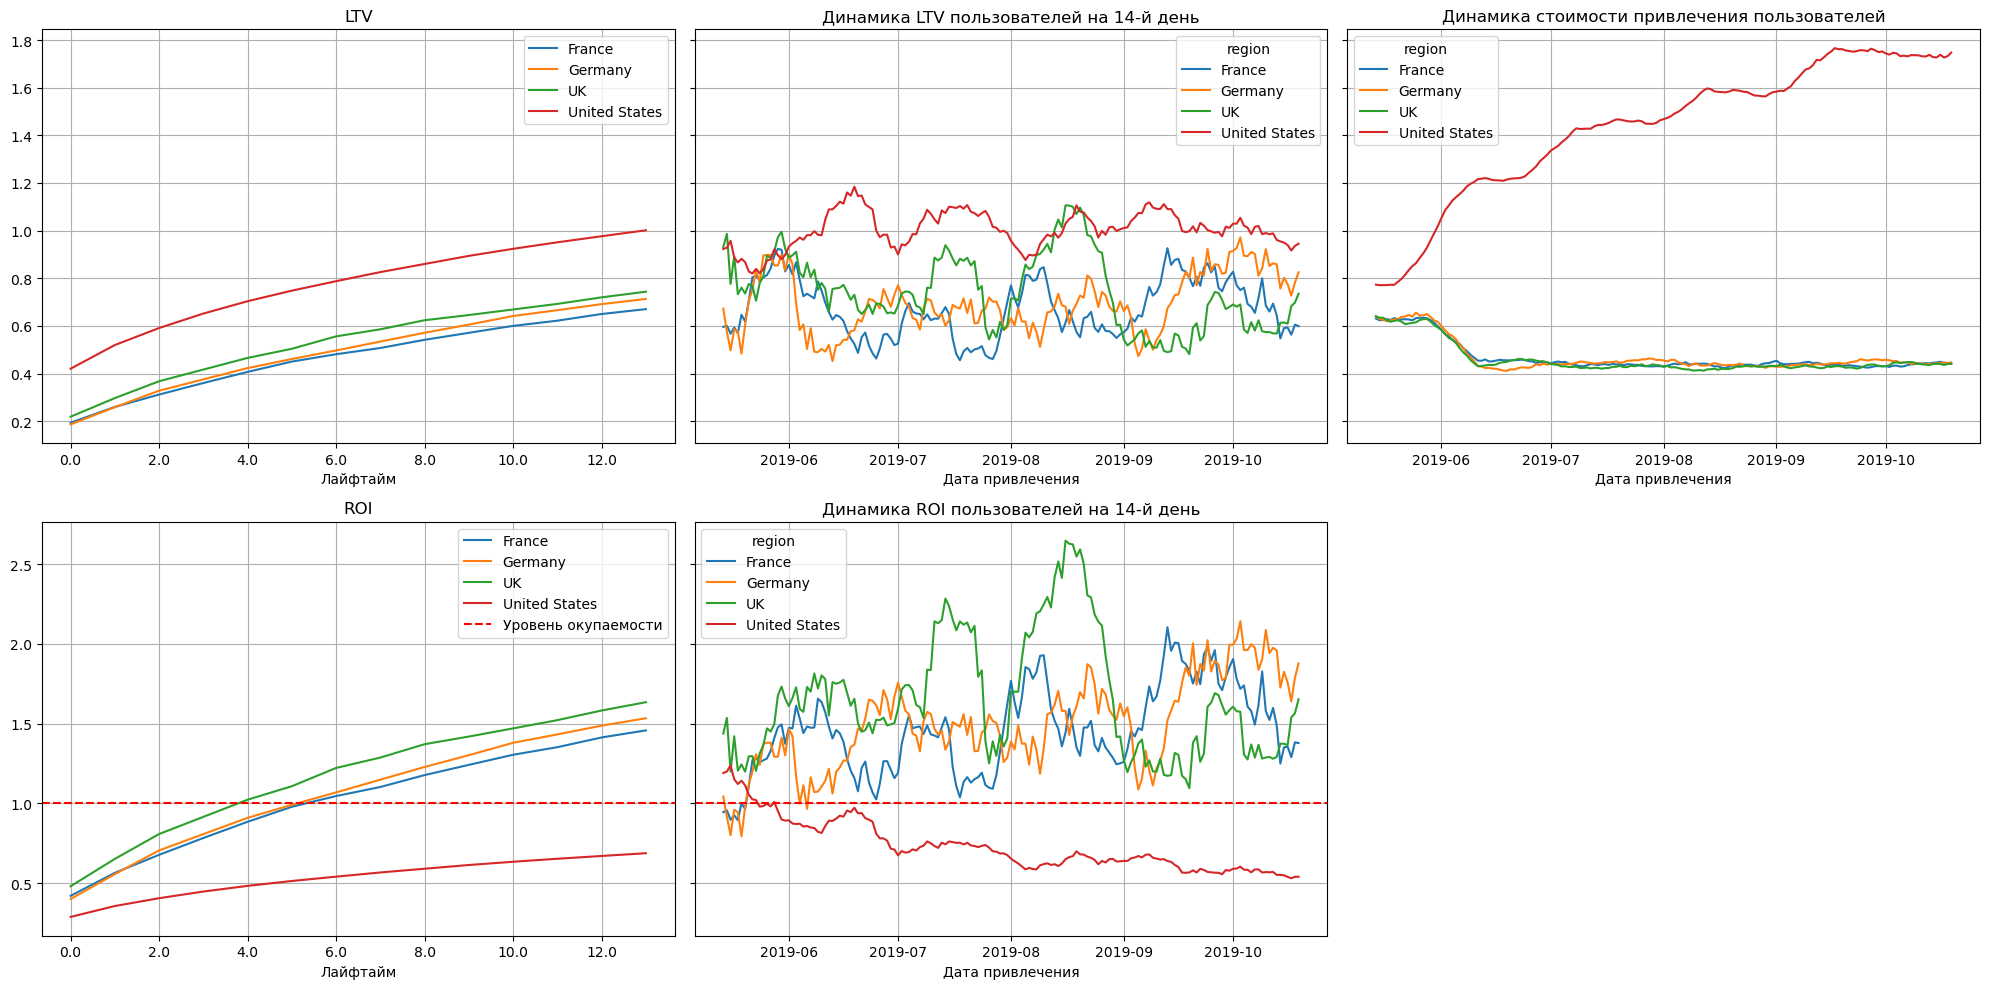

In [36]:
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- У пользователей из США LTV выше, чем у пользователей из других стран.
- Начиная с мая, стоимость привлечения пользователей из США резко возрастает и становится гораздо выше, чем у пользователей из других стран. 
- При этом график ROI и график динамики ROI пользователей на 14 день показывают, что реклама не окупилась только у пользователей из США.

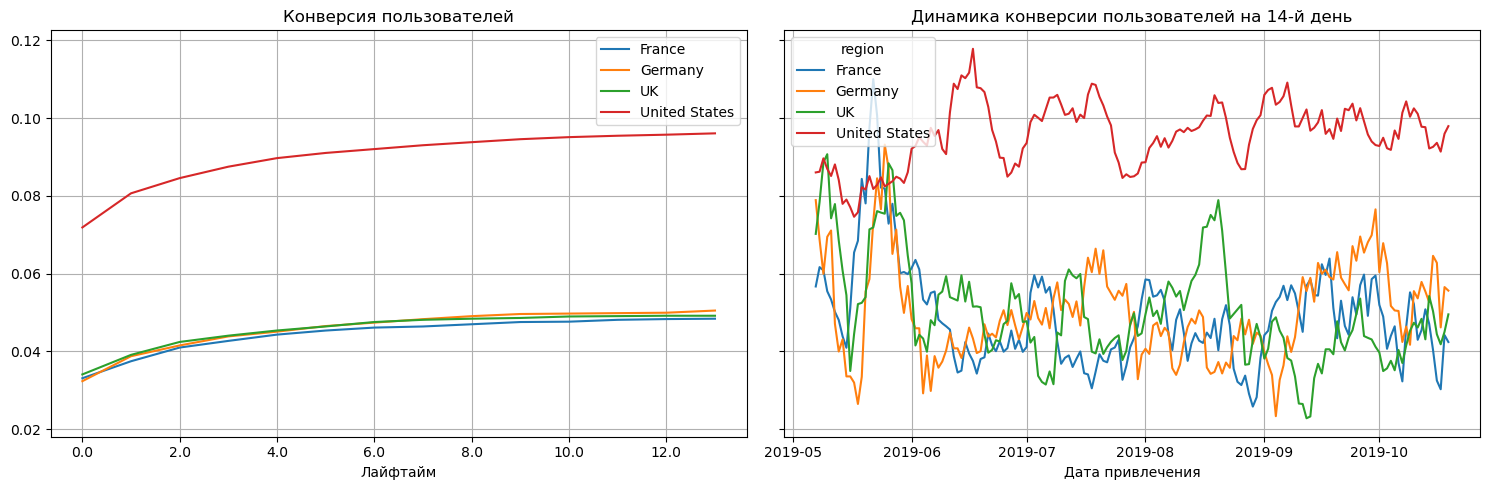

In [37]:
# считаем конверсию и динамику ее изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графику коверсии, пользователи из США ковертируются лучше, чем пользователи из других стран.

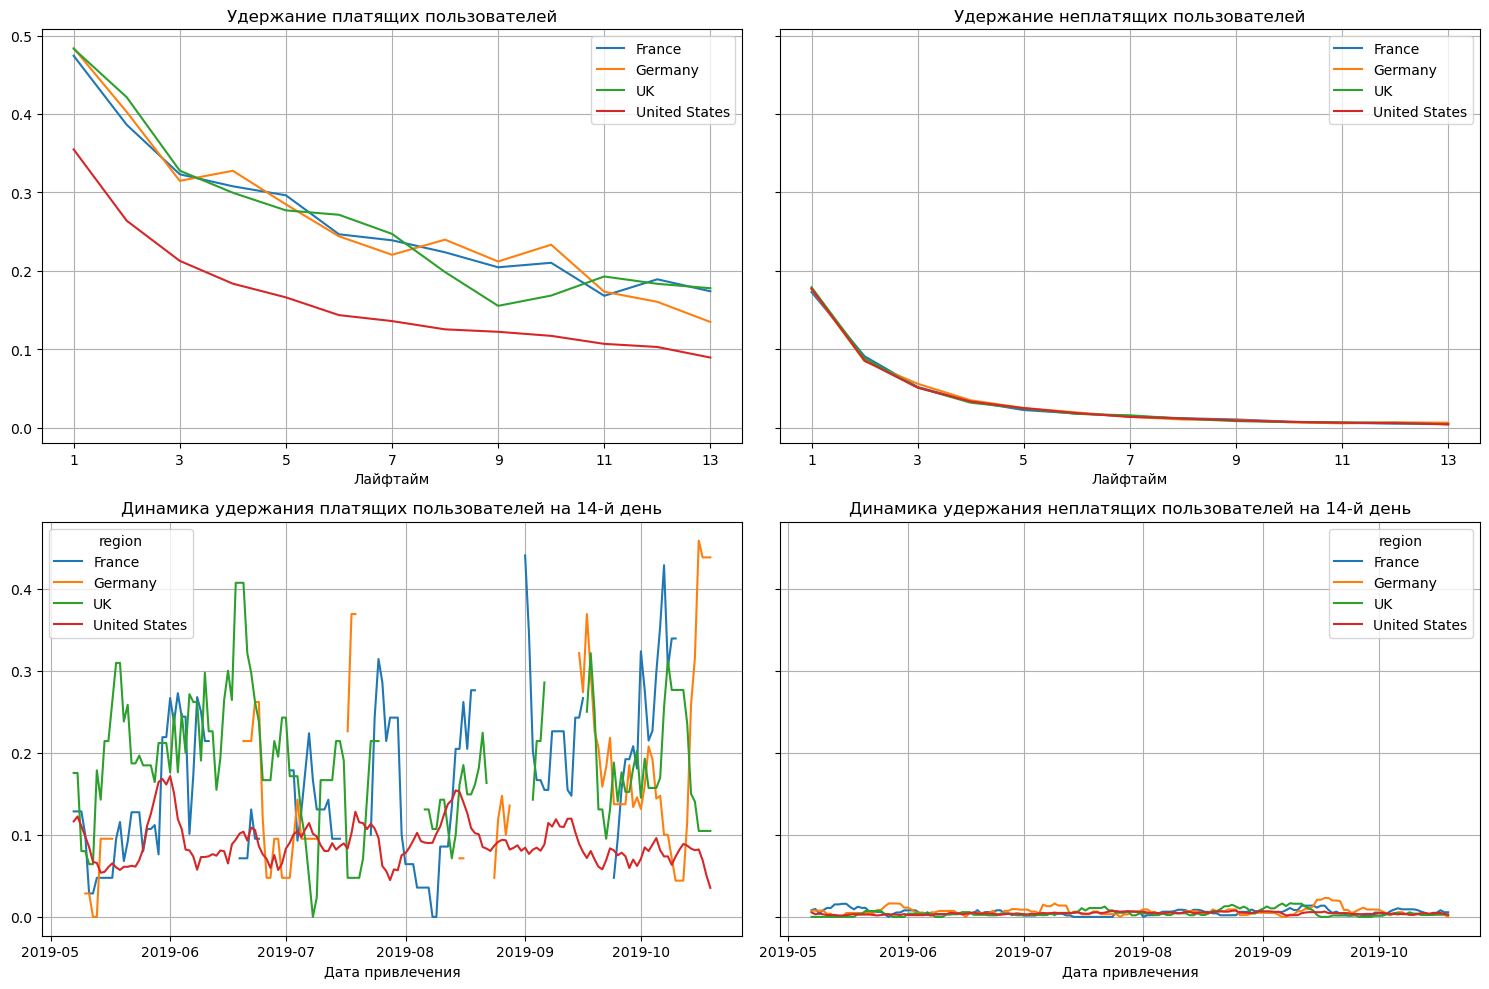

In [38]:
# считаем удержание и динамику его изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Графики показывают, что у платящих пользователей из США удержание ниже, чем у пользователей из других стран. Проверим, из какой страны приводят трафик два самых крупных канала – TipTop и FaceBoom.

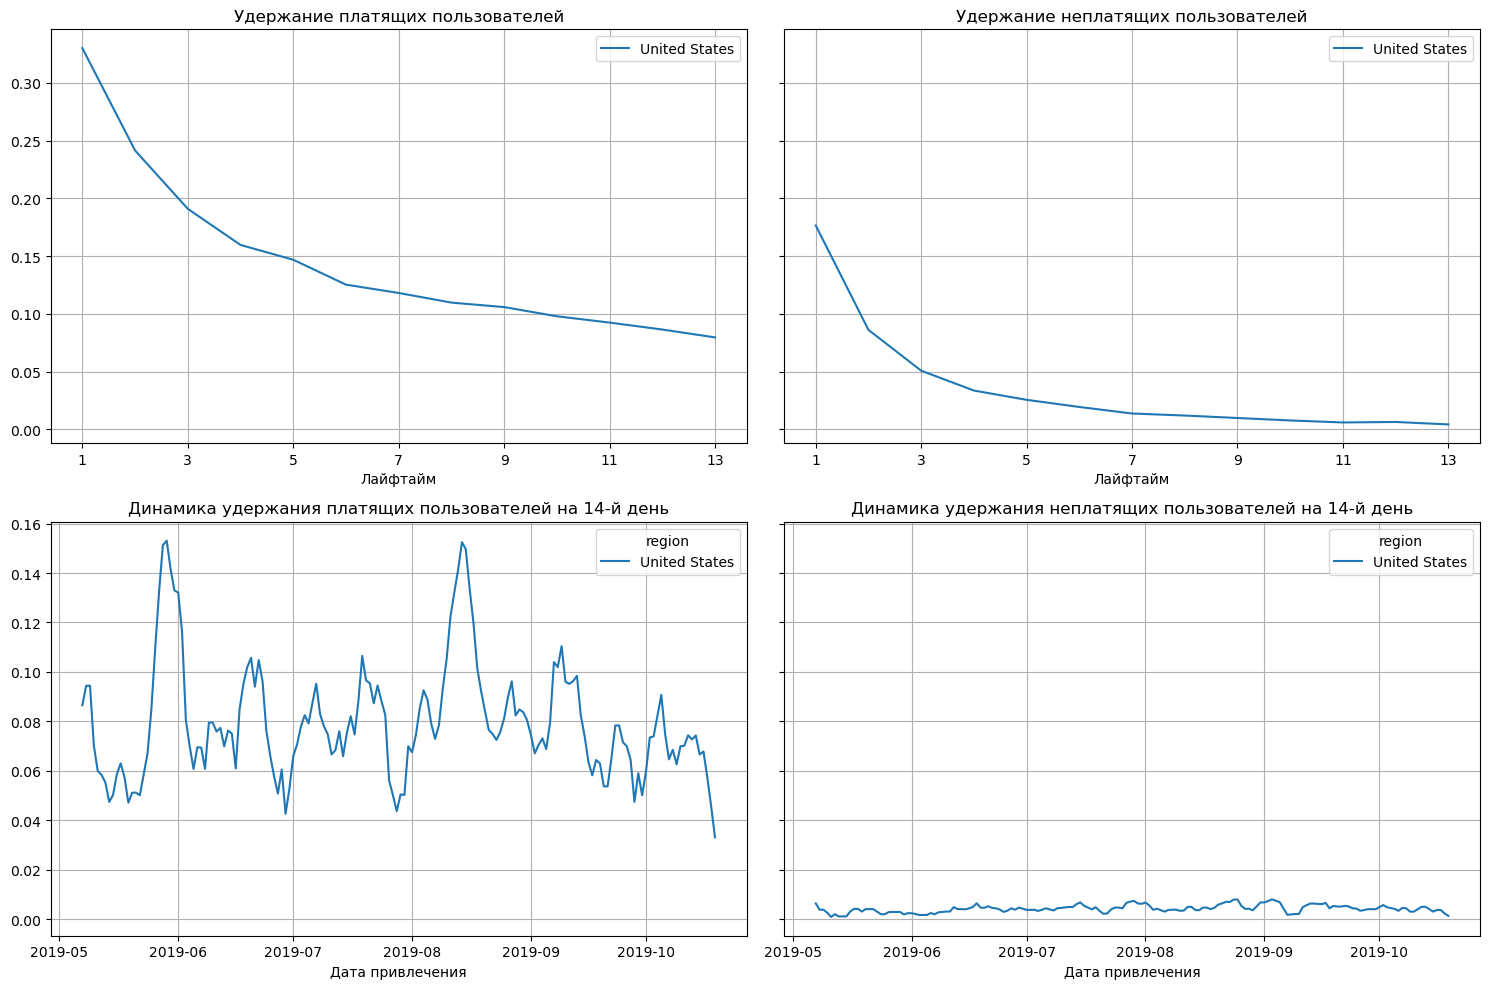

In [39]:
TipTop_FaceBoom_profiles = profiles.query('channel in ["TipTop", "FaceBoom"]')

# считаем удержание и динамику его изменения
retention_raw, retention_grouped, retention_history = get_retention(
    TipTop_FaceBoom_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

TipTop и FaceBoom приводят трафик только из США. Значит, проблемы с удержанием в США могут быть связаны с этими каналами. 

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

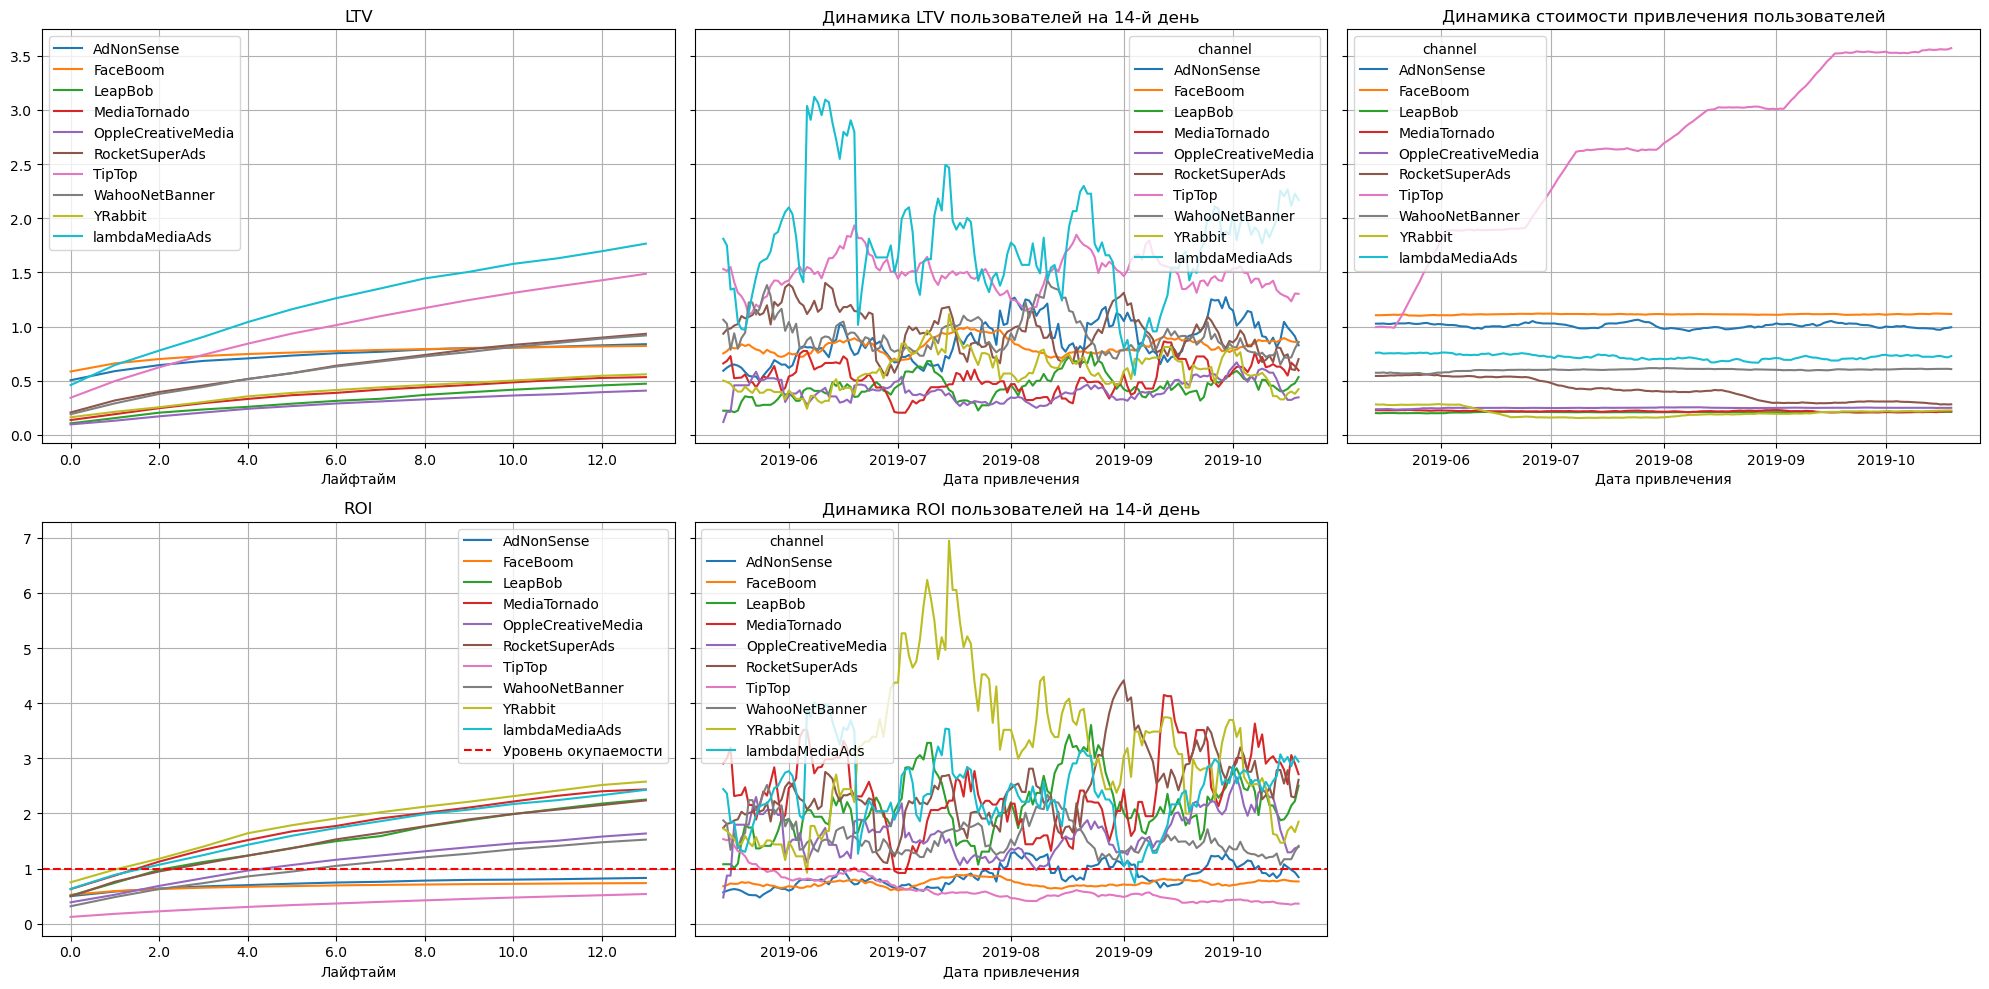

In [40]:
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- Самый высокий LTV – у источника lambdaMediaAds при довольно низкой стоимости привлечения. На втором месте по показателю LTV - источник TipTop.
- Начиная с мая, стоимость привлечения у источника TipTop резко возрастает и становится гораздо выше, чем у пользователей из других стран. Поэтому стоимость привлечения пользователей из США также резко возрастает.
- График ROI показывает, что реклама не окупилась у трех источников привлечения – TipTop, FaceBoom и AdNonSense.

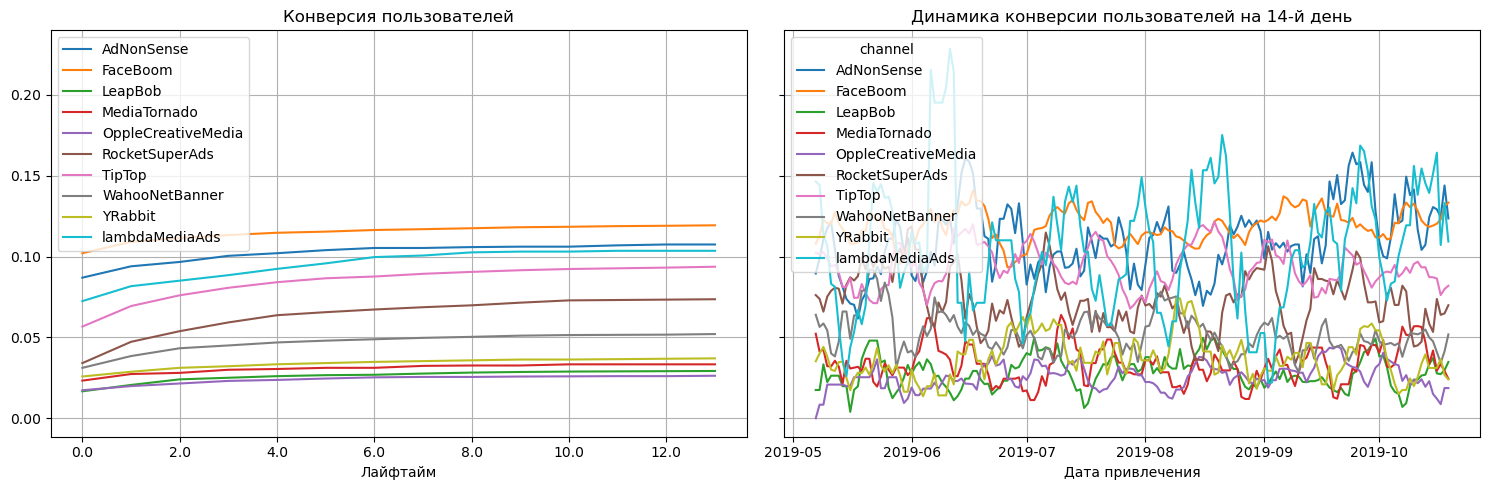

In [41]:
# считаем конверсию и динамику ее изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графику конверсии, самая высокая конверсия – у канала FaceBoom, затем идут каналы AdNonSense, lambdaMediaAds, TipTop

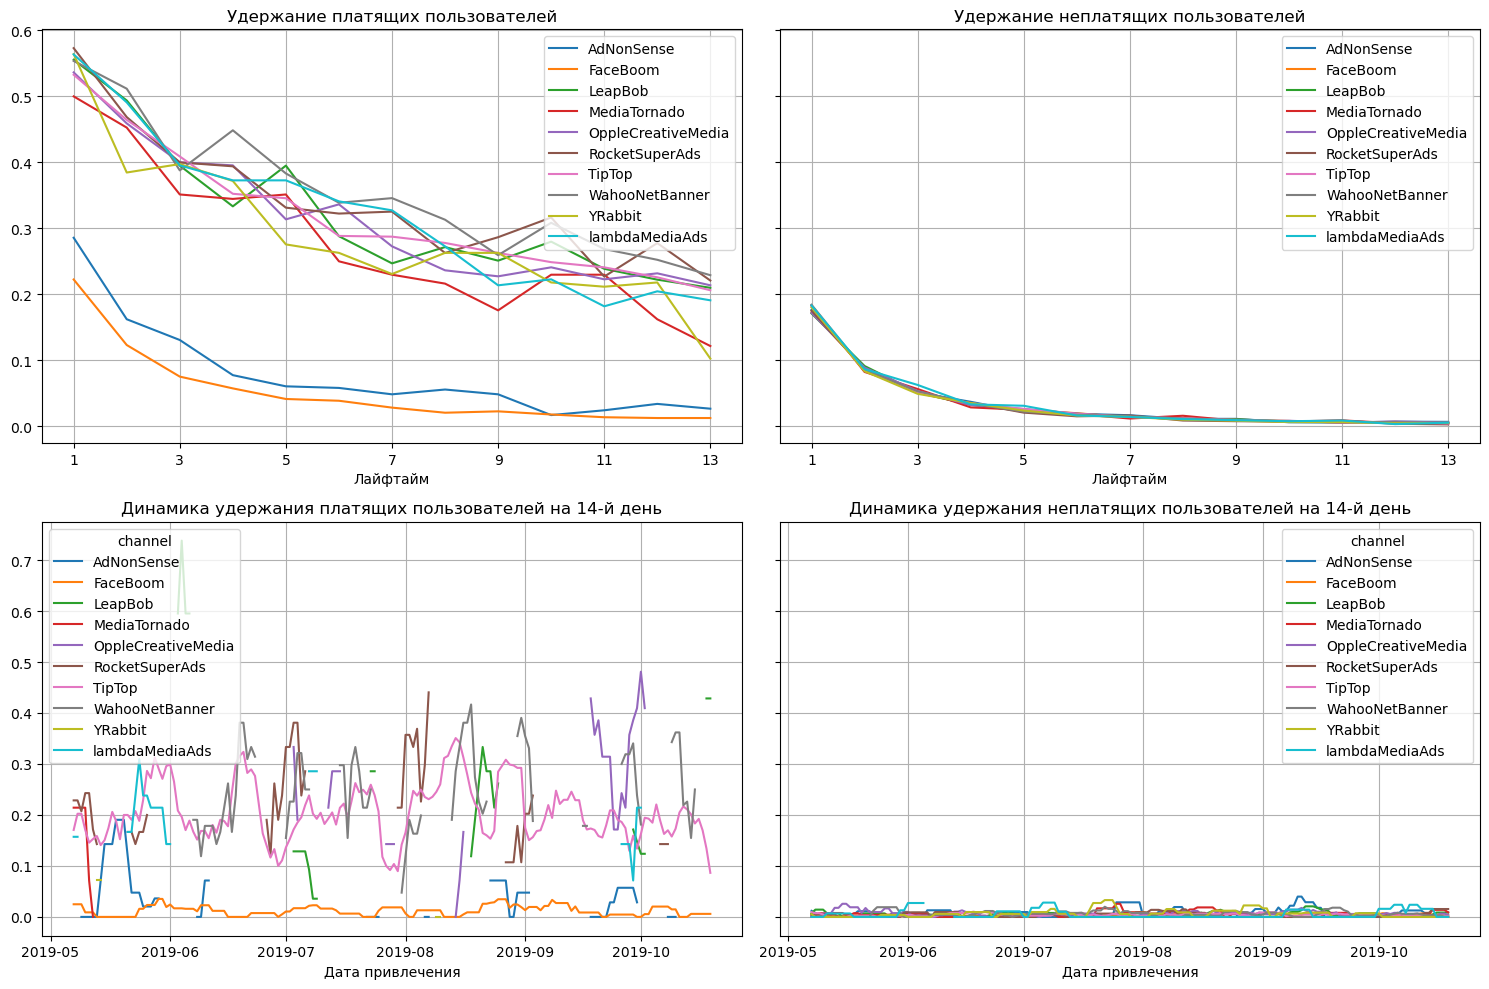

In [42]:
# считаем удержание и динамику его изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Графики удержания платящих пользователей показывают, что удержание у каналов AdNonSense и FaceBoom гораздо ниже, чем у других каналов привлечения.

**Выводы**

- В целом реклама, направленная на привлечение пользователей, не окупается. ROI в конце недели — чуть выше 80%.
- На окупаемость рекламы негативное влияние могут оказывать такие устройства, как Mac, iPhone и Android, страна США и каналы TipTop, FaceBoom и AdNonSense.
- Проблемы окупаемости могут быть связаны с затратами на привлечение пользователей из США, которые вызваны слишком большими затратами на канал TipTop. Эти затраты рекомендуется снизить.

### Общий вывод

- Доля платящих пользователей больше в США, среди пользователей, которые предпочитают Mac и iPhone, и у каналов FaceBoom, AdNonSense, lambdaMediaAds, TipTop.
- Больше всего денег было потрачено на рекламные источники TipTop и FaceBoom. При этом на TipTop было потрачено больше половины от общей суммы расходов на маркетинг. Средняя стоимость привлечения одного пользователя из источника TipTop в 2,5 раза больше, чем из источника FaceBoom.
- Реклама, направленная на привлечение пользователей, в целом не окупается. На окупаемость рекламы негативное влияние могут оказывать такие устройства, как Mac, iPhone и Android, страна США и каналы TipTop, FaceBoom и AdNonSense.
- Рекомендуется прежде всего снизить рекламные расходы на канал TipTop. Это поможет снизить затраты на привлечение пользователей из США и увеличить удержание пользователей из этого региона. Также рекомендуется увеличить удержание пользователей, которые предпочитают Mac, iPhone и Android, и удержание для каналов AdNonSense и FaceBoom. Кроме того, рекомендуется увеличить рекламные расходы на перспективный канал привлечения lambdaMediaAds.